In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [59]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [60]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


# Pre-Processing

## Balancing data

### Count of fraud & non-fraud transactions

In [61]:
print('No Frauds', round(df_train.is_fraud.value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train.is_fraud.value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset


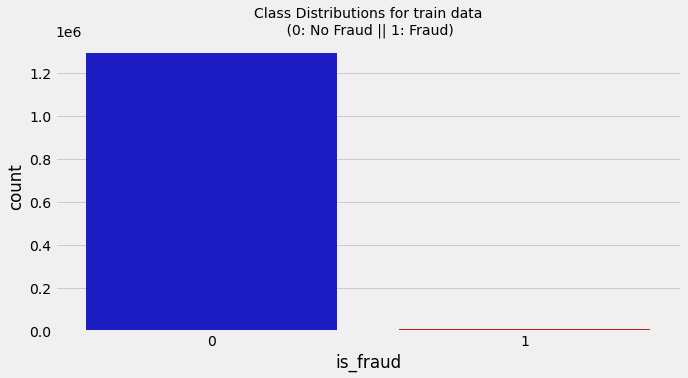

In [62]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('is_fraud', data=df_train, palette=colors)
plt.title('Class Distributions for train data\n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [63]:
print('No Frauds', round(df_test.is_fraud.value_counts()[0]/len(df_test) * 100,2), '% of the dataset')
print('Frauds', round(df_test.is_fraud.value_counts()[1]/len(df_test) * 100,2), '% of the dataset')

No Frauds 99.61 % of the dataset
Frauds 0.39 % of the dataset


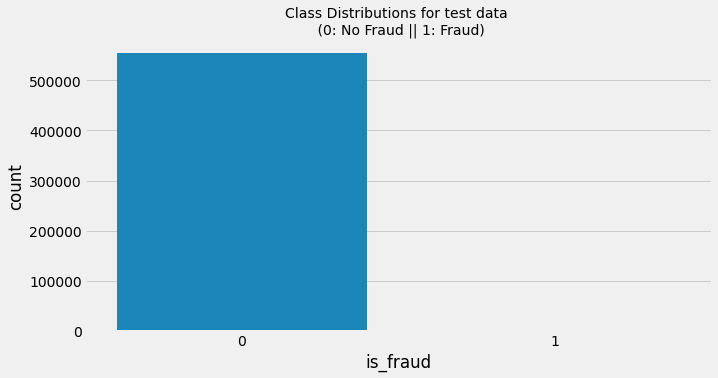

In [64]:
sns.countplot('is_fraud', data=df_test)
plt.title('Class Distributions for test data \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

From the above two outputs we can observe that fraud transactions are negligible in comparison to normal transactions, if we will use this kind of unbalances data, our model will be biased. We need to balance out the data.

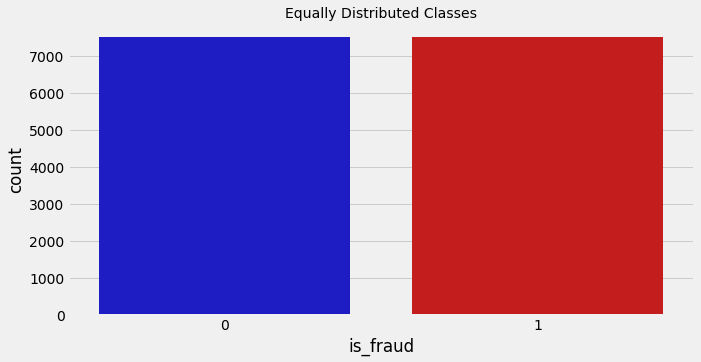

In [65]:
df_train = df_train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df_train = df_train.loc[df_train['is_fraud'] == 1]
non_fraud_df_train = df_train.loc[df_train['is_fraud'] == 0][:7506]

normal_distributed_df_train = pd.concat([fraud_df_train, non_fraud_df_train])

# Shuffle dataframe rows
new_df_train = normal_distributed_df_train.sample(frac=1, random_state=42)

sns.countplot('is_fraud', data=new_df_train, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

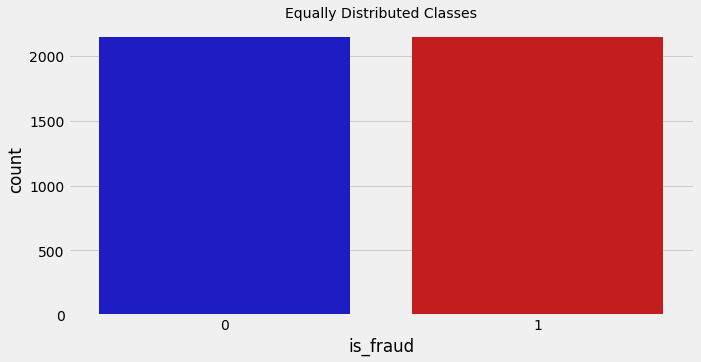

In [66]:
df_test = df_test.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df_test = df_test.loc[df_test['is_fraud'] == 1]
non_fraud_df_test = df_test.loc[df_test['is_fraud'] == 0][:2145]

normal_distributed_df_test = pd.concat([fraud_df_test, non_fraud_df_test])

# Shuffle dataframe rows
new_df_test = normal_distributed_df_test.sample(frac=1, random_state=42)

sns.countplot('is_fraud', data=new_df_test, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [67]:
df = pd.concat([new_df_train, new_df_test])
df_backup = df
print("Shape of merged data:", df.shape)

Shape of merged data: (19302, 23)


In [11]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1009952,1009952,2020-02-19 23:46:02,3533177016567295,fraud_Dooley-Thompson,misc_net,852.75,Derek,Bentley,M,782 Lee Crossing Apt. 209,...,40.8731,-96.1528,1517,Dealer,1951-11-08,5772d41831f2f0d477349772a32bf627,1361317562,41.082580,-95.573292,1
246580,246580,2019-05-03 23:00:23,4358137750029944984,"fraud_Lowe, Dietrich and Erdman",kids_pets,19.21,Dawn,Stephens,F,91542 Marissa Shores Apt. 053,...,42.7012,-92.0762,53,Sports administrator,1972-10-05,0850129a9e378fe808b71e8e795a2996,1336086023,41.920526,-91.150285,1
520702,520702,2019-08-12 15:09:03,3576431665303017,fraud_Streich Ltd,home,63.28,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922,Contractor,1981-10-24,8be4a27e46de64a318f7360906276c4a,1344784143,32.839685,-112.445502,0


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.930200e+04,1.930200e+04,19302.000000,19302.000000,19302.000000,19302.000000,1.930200e+04,1.930200e+04,19302.000000,19302.000000,19302.000000
mean,5.549063e+05,4.093948e+17,298.993464,48434.835147,38.624662,-90.126985,8.678916e+04,1.355846e+09,38.622737,-90.125931,0.500000
std,3.840632e+05,1.296126e+18,376.962122,27002.818032,5.137002,14.029160,2.968941e+05,1.764770e+07,5.171767,14.040607,0.500013
min,2.820000e+02,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325389e+09,19.161782,-166.574331,0.000000
25%,2.208602e+05,1.800312e+14,20.330000,25213.000000,34.778900,-96.727000,7.590000e+02,1.340946e+09,34.853299,-96.707184,0.000000
50%,4.815085e+05,3.520550e+15,88.965000,47840.000000,39.390000,-87.420800,2.523000e+03,1.355364e+09,39.430590,-87.366606,0.500000
75%,8.931615e+05,4.634483e+15,473.762500,71232.000000,42.071600,-80.065200,1.905400e+04,1.370479e+09,42.015994,-80.115929,1.000000
max,1.296660e+06,4.992346e+18,7886.260000,99921.000000,66.693300,-67.950300,2.906700e+06,1.388534e+09,67.510267,-66.960745,1.000000


In [14]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

We don't have any NaN values

In [15]:
df.select_dtypes(exclude=["number"])

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
1009952,2020-02-19 23:46:02,fraud_Dooley-Thompson,misc_net,Derek,Bentley,M,782 Lee Crossing Apt. 209,Weeping Water,NE,Dealer,1951-11-08,5772d41831f2f0d477349772a32bf627
246580,2019-05-03 23:00:23,"fraud_Lowe, Dietrich and Erdman",kids_pets,Dawn,Stephens,F,91542 Marissa Shores Apt. 053,Oran,IA,Sports administrator,1972-10-05,0850129a9e378fe808b71e8e795a2996
520702,2019-08-12 15:09:03,fraud_Streich Ltd,home,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,Phoenix,AZ,Contractor,1981-10-24,8be4a27e46de64a318f7360906276c4a
194161,2019-04-10 06:20:48,"fraud_Lockman, West and Runte",grocery_pos,Michelle,Johnston,F,3531 Hamilton Highway,Roma,TX,IT trainer,1990-11-07,6ff3ef39b29b1f648a87882b9d16d299
1205107,2020-05-18 19:59:21,fraud_Hamill-Daugherty,misc_net,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,Applications developer,1966-06-07,518bfda4237c61c64e6de0d603016031
...,...,...,...,...,...,...,...,...,...,...,...,...
75548,2020-07-17 17:53:25,"fraud_Prosacco, Kreiger and Kovacek",home,Brooke,Rodriguez,F,901 Todd Gardens Apt. 466,Mountain Center,CA,"Therapist, music",1988-09-19,6538cccc09ec3feb31157308e18337db
151221,2020-08-12 22:24:12,fraud_Bauch-Raynor,grocery_pos,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,ND,"Designer, ceramics/pottery",1948-06-30,69091e3ce814474c832667cafd334817
409185,2020-11-29 20:35:28,fraud_Kub PLC,personal_care,Catherine,Weber,F,74890 Rodriguez Springs Apt. 540,West Henrietta,NY,"Teacher, primary school",1968-06-24,1930c7577706c896564780c1c07dff0c
504392,2020-12-20 20:57:41,fraud_Heaney-Marquardt,entertainment,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,1980-08-18,93d572600f8a872f792573d1dcf90b24


### Label Encoding

In [16]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# List of columns for label encoding
colmns = ['category', 'gender', 'city', 'state', 'job']

for column in colmns:
    # Encode labels in column
    df[column]= label_encoder.fit_transform(df[column])

In [17]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1009952,1009952,2020-02-19 23:46:02,3533177016567295,fraud_Dooley-Thompson,8,852.75,Derek,Bentley,1,782 Lee Crossing Apt. 209,...,40.8731,-96.1528,1517,120,1951-11-08,5772d41831f2f0d477349772a32bf627,1361317562,41.082580,-95.573292,1
246580,246580,2019-05-03 23:00:23,4358137750029944984,"fraud_Lowe, Dietrich and Erdman",7,19.21,Dawn,Stephens,0,91542 Marissa Shores Apt. 053,...,42.7012,-92.0762,53,434,1972-10-05,0850129a9e378fe808b71e8e795a2996,1336086023,41.920526,-91.150285,1
520702,520702,2019-08-12 15:09:03,3576431665303017,fraud_Streich Ltd,6,63.28,Jessica,Ward,0,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922,107,1981-10-24,8be4a27e46de64a318f7360906276c4a,1344784143,32.839685,-112.445502,0
194161,194161,2019-04-10 06:20:48,4939976756738216,"fraud_Lockman, West and Runte",4,170.69,Michelle,Johnston,0,3531 Hamilton Highway,...,26.4215,-99.0025,18128,240,1990-11-07,6ff3ef39b29b1f648a87882b9d16d299,1334038848,26.165932,-99.580658,0
1205107,1205107,2020-05-18 19:59:21,30175986190993,fraud_Hamill-Daugherty,8,905.00,Rebecca,Butler,0,0665 Lisa Alley,...,47.5375,-95.9941,516,28,1966-06-07,518bfda4237c61c64e6de0d603016031,1368907161,48.211060,-96.661536,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75548,75548,2020-07-17 17:53:25,4104312520615374,"fraud_Prosacco, Kreiger and Kovacek",6,48.43,Brooke,Rodriguez,0,901 Todd Gardens Apt. 466,...,33.6401,-116.5567,1661,471,1988-09-19,6538cccc09ec3feb31157308e18337db,1374083605,32.829524,-116.584911,0
151221,151221,2020-08-12 22:24:12,374497717543058,fraud_Bauch-Raynor,4,340.63,Linda,Hurst,0,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,121,1948-06-30,69091e3ce814474c832667cafd334817,1376346252,48.131002,-101.665120,1
409185,409185,2020-11-29 20:35:28,213161293389774,fraud_Kub PLC,10,42.39,Catherine,Weber,0,74890 Rodriguez Springs Apt. 540,...,43.0397,-77.6871,10256,454,1968-06-24,1930c7577706c896564780c1c07dff0c,1385757328,42.677454,-77.171772,0
504392,504392,2020-12-20 20:57:41,2720012583106919,fraud_Heaney-Marquardt,0,75.61,Joseph,Murray,1,42933 Ryan Underpass,...,43.3526,-102.5411,1126,488,1980-08-18,93d572600f8a872f792573d1dcf90b24,1387573061,42.625421,-102.023793,0


### Making age of user using 'dob' column

In [18]:
df['dob'] = df['dob'].str[0:4]
df['dob'] = df['dob'].astype(int)
df['dob'] = 2022-df['dob']
df['dob']

1009952    71
246580     50
520702     41
194161     32
1205107    56
           ..
75548      34
151221     74
409185     54
504392     42
282237     59
Name: dob, Length: 19302, dtype: int32

### Making transaction_hour column

In [19]:
df['transaction_hour'] = df['trans_date_trans_time'].str[11:13]
df['transaction_hour'] = df['transaction_hour'].astype(int)
df['transaction_hour']

1009952    23
246580     23
520702     15
194161      6
1205107    19
           ..
75548      17
151221     22
409185     20
504392     20
282237     22
Name: transaction_hour, Length: 19302, dtype: int32

### Making column for weekday on which transaction was done

In [20]:
df["transaction_date"] = df['trans_date_trans_time'].str[:10]
df["transaction_date"] = df["transaction_date"].apply(pd.to_datetime)
df["transaction_date"]

1009952   2020-02-19
246580    2019-05-03
520702    2019-08-12
194161    2019-04-10
1205107   2020-05-18
             ...    
75548     2020-07-17
151221    2020-08-12
409185    2020-11-29
504392    2020-12-20
282237    2020-10-04
Name: transaction_date, Length: 19302, dtype: datetime64[ns]

In [21]:
# The day of the week with Monday=0, Sunday=6.
df["transaction_weekday"] = df["transaction_date"].dt.dayofweek
df["transaction_weekday"]

1009952    2
246580     4
520702     0
194161     2
1205107    0
          ..
75548      4
151221     2
409185     6
504392     6
282237     6
Name: transaction_weekday, Length: 19302, dtype: int64

### Dropping columns

In [22]:
df1 = df.drop(['trans_date_trans_time', 'merchant', 'Unnamed: 0', 'trans_num', 'first', 'last',
              'unix_time', 'transaction_date'], axis='columns')
df1.columns

Index(['cc_num', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'transaction_hour', 'transaction_weekday'],
      dtype='object')

### Correlation Matrix

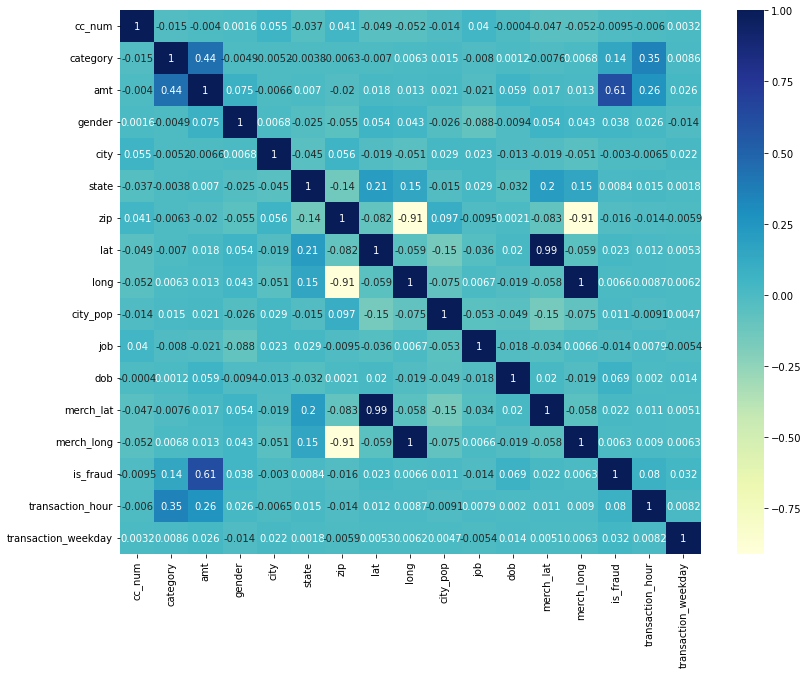

In [23]:
plt.figure(figsize=(13, 10))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the above matrix, we can conclude that columns- 'category', 'amt', 'gender', 'dob', and 'transaction_hour' are most correlated with target column and therefore, we will use these attributes only.

In [24]:
df_final = df1[['category', 'amt', 'gender', 'dob', 'transaction_hour', 'is_fraud']]
df_final = df_final.sample(frac=1, random_state=0)

X = df_final[['category', 'amt', 'gender', 'dob', 'transaction_hour']]
y = df_final[['is_fraud']]

print("Shape of independent variables table:", X.shape)
print("Shape of target variable table:", y.shape)

Shape of independent variables table: (19302, 5)
Shape of target variable table: (19302, 1)


In [25]:
# df_final.to_csv("cleaned_fraud_data.csv", index=False)

## Comparing 8 classifiers using lazypredict

In [26]:
#pip install lazypredict 

In [27]:
!python --version

Python 3.8.1


In [28]:
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,5)

# train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.5, random_state=12)

#### Listing all available Classifiers

In [29]:
for i in range(29):
    print(i+1, lazypredict.Supervised.CLASSIFIERS[i][0])

1 AdaBoostClassifier
2 BaggingClassifier
3 BernoulliNB
4 CalibratedClassifierCV
5 CategoricalNB
6 DecisionTreeClassifier
7 DummyClassifier
8 ExtraTreeClassifier
9 ExtraTreesClassifier
10 GaussianNB
11 KNeighborsClassifier
12 LabelPropagation
13 LabelSpreading
14 LinearDiscriminantAnalysis
15 LinearSVC
16 LogisticRegression
17 NearestCentroid
18 NuSVC
19 PassiveAggressiveClassifier
20 Perceptron
21 QuadraticDiscriminantAnalysis
22 RandomForestClassifier
23 RidgeClassifier
24 RidgeClassifierCV
25 SGDClassifier
26 SVC
27 StackingClassifier
28 XGBClassifier
29 LGBMClassifier


In [30]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     classifiers='all',
                    )
models, predictions = clf.fit(X_train, X_valid, y_train, y_valid)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:18<00:01,  2.06it/s]

[13:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:20<00:00,  1.43it/s]


In [31]:
models.head(8)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.98,0.98,0.98,0.14
XGBClassifier,0.98,0.98,0.98,0.98,1.37
RandomForestClassifier,0.98,0.98,0.98,0.98,0.66
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.50
BaggingClassifier,0.97,0.97,0.97,0.97,0.22
DecisionTreeClassifier,0.97,0.97,0.97,0.97,0.04
ExtraTreeClassifier,0.95,0.95,0.95,0.95,0.02
AdaBoostClassifier,0.94,0.94,0.94,0.94,0.34


In [32]:
models["Accuracy"][0:8]

Model
LGBMClassifier           0.98
XGBClassifier            0.98
RandomForestClassifier   0.98
ExtraTreesClassifier     0.97
BaggingClassifier        0.97
DecisionTreeClassifier   0.97
ExtraTreeClassifier      0.95
AdaBoostClassifier       0.94
Name: Accuracy, dtype: float64

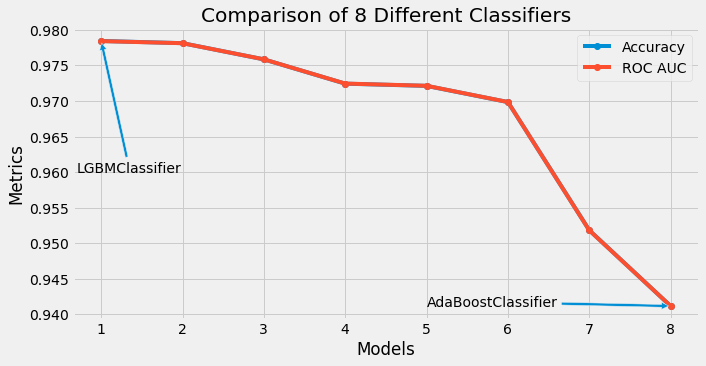

In [33]:
idx = [i for i in range(1,28)]
plt.plot(idx[0:8], models["Accuracy"][0:8]  ,marker='o' , label = "Accuracy" )
plt.plot(idx[0:8], models["ROC AUC"][0:8] , marker ='o' , label = "ROC AUC")
plt.annotate(models.index[0] , 
             (1, models["Accuracy"][0]) , 
             xytext = (0.7, 0.96),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.annotate(models.index[7] , 
             (8, models["Accuracy"][7]) , 
             xytext = (5, models["Accuracy"][7]),
             arrowprops = dict(
                               arrowstyle = "simple"
                              ))
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Comparison of 8 Different Classifiers")
plt.legend()
plt.show()

## XGBOOST Classifier

In [34]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

[13:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
import sklearn.metrics as metrics
y_pred = my_model.predict_proba(X_valid)[:,1]
print("ROC AUC before parameter tuning:", metrics.roc_auc_score(y_valid, y_pred))

ROC AUC before parameter tuning: 0.9975953345646869


In [36]:
from sklearn.metrics import accuracy_score

y_pred = my_model.predict(X_valid)
y_pred = [round(value) for value in y_pred]

# Evaluate predictions
accuracy_score(y_valid, y_pred)

0.9781369806237695

### Hyper-Parameter Tuning

In [37]:
# For hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_valid, y_valid)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid)
    accuracy = accuracy_score(y_valid, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.9303699098539011                                                                                                     
SCORE:                                                                                                                 
0.9366904983939488                                                                                                     
SCORE:                                                                                                                 
0.9174178841570821                                                                                                     
SCORE:                                                                                                                 
0.9188685110351259                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.9375194280385453                                                                                                     
SCORE:                                                                                                                 
0.9335820122267122                                                                                                     
SCORE:                                                                                                                 
0.9317169205263703                                                                                                     
SCORE:                                                                                                                 
0.9372085794218216                                                                                                     
SCORE:                                  

In [38]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5607308338900697, 'gamma': 1.0166615191167327, 'max_depth': 17.0, 'min_child_weight': 1.0, 'reg_alpha': 40.0, 'reg_lambda': 0.4244478762830584}


In [39]:
tuned_xgb = xgb.XGBClassifier(colsample_bytree= 0.998807267028738, gamma= 1.321962425893548,max_depth=10, min_child_weight= 0.0, reg_alpha=43.0, reg_lambda= 0.4888063780234211)
tuned_xgb.fit(X_train, y_train)

[13:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.998807267028738,
              gamma=1.321962425893548, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=0.0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=43.0,
              reg_lambda=0.4888063780234211, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = tuned_xgb.predict(X_valid)
y_pred = [round(value) for value in y_pred]

# Evaluate predictions
accuracy_score(y_valid, y_pred)

0.9609366904983939

In [41]:
y_pred = tuned_xgb.predict_proba(X_valid)[:,1]
print("ROC AUC after parameter tuning:", metrics.roc_auc_score(y_valid, y_pred))

ROC AUC after parameter tuning: 0.9917112534176591


After comparing ROC AUC of before and after parameter tuning, we can conclude that our model is performing better without tuning and has the best parameters by default.

## LightGBM Classifier

In [42]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [43]:
y_pred = model.predict(X_valid)
y_pred = [round(value) for value in y_pred]

accuracy_score(y_valid, y_pred)

0.9778261320070459

In [44]:
y_pred = model.predict_proba(X_valid)[:,1]
print("ROC AUC before parameter tuning:", metrics.roc_auc_score(y_valid, y_pred))

ROC AUC before parameter tuning: 0.9977071020656094


### Hyper-Parameter Tuning of LightGBM Classifier

In [45]:
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

fit_params = {"early_stopping_rounds":30, "eval_metric" : 'auc', "eval_set" : [(X_valid,y_valid)],
            'eval_names': ['valid'], 'verbose': 100, 'categorical_feature': 'auto'}

test_params = {'num_leaves': sp_randint(6, 50), 'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# Parameter defining the number of HP points to be tested
hp_points = 100

# n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(estimator=clf, param_distributions=test_params, 
    n_iter=hp_points, scoring='roc_auc', cv=3, refit=True, random_state=314, verbose=True)

# Optimal parameters
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

clf_sw = lgb.LGBMClassifier(**clf.get_params())
# Set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

In [46]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc', cv=5, refit=True, verbose=True)

gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.995308


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[200]	valid's auc: 0.996664
[300]	valid's auc: 0.997091
Early stopping, best iteration is:
[358]	valid's auc: 0.997231
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.994655
[200]	valid's auc: 0.996542
[300]	valid's auc: 0.997067
[400]	valid's auc: 0.99731
[500]	valid's auc: 0.99737
Early stopping, best iteration is:
[479]	valid's auc: 0.997373
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.994984
[200]	valid's auc: 0.996727
[300]	valid's auc: 0.997192
[400]	valid's auc: 0.997424
Early stopping, best iteration is:
[399]	valid's auc: 0.997425
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.995066
[200]	valid's auc: 0.996599
[300]	valid's auc: 0.997022
[400]	valid's auc: 0.997173
Early stopping, best iteration is:
[427]	valid's auc: 0.997213
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.994812
[200]	valid's auc: 0.996506
[300]	valid's auc: 0.996918
[4

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   13.0s finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.995698
[200]	valid's auc: 0.997239
[300]	valid's auc: 0.997703
[400]	valid's auc: 0.997887
Early stopping, best iteration is:
[454]	valid's auc: 0.997944
Best score reached: 0.9969521280590967 with params: {'scale_pos_weight': 12} 


In [47]:
def learning_rate_decay_power(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(0.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

# Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())

# Set optimal parameters
clf_final.set_params(**opt_parameters)

# Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate = learning_rate_decay_power)])

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.994572
[200]	valid's auc: 0.996353
[300]	valid's auc: 0.996845
[400]	valid's auc: 0.996999
[500]	valid's auc: 0.99707
[600]	valid's auc: 0.997114
[700]	valid's auc: 0.997146
[800]	valid's auc: 0.997163
[900]	valid's auc: 0.997172
[1000]	valid's auc: 0.997181
[1100]	valid's auc: 0.99719
[1200]	valid's auc: 0.997198
[1300]	valid's auc: 0.997206
[1400]	valid's auc: 0.997212
[1500]	valid's auc: 0.997219
[1600]	valid's auc: 0.997226
[1700]	valid's auc: 0.997232
[1800]	valid's auc: 0.997238
[1900]	valid's auc: 0.997242
[2000]	valid's auc: 0.997248
[2100]	valid's auc: 0.997253
[2200]	valid's auc: 0.997261
[2300]	valid's auc: 0.997268
[2400]	valid's auc: 0.997274
[2500]	valid's auc: 0.997278
[2600]	valid's auc: 0.997282
[2700]	valid's auc: 0.997286
Early stopping, best iteration is:
[2708]	valid's auc: 0.997286


LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

In [48]:
clf_final

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, subsample=0.855)

In [49]:
y_pred = clf_final.predict_proba(X_valid)[:,1]
print("ROC AUC after parameter tuning:", metrics.roc_auc_score(y_valid, y_pred))

ROC AUC after parameter tuning: 0.9972863580861522


### Save LightGBM model

In [53]:
# import pickle
# pickle_out = open("lgbm_model.pkl", "wb")
# pickle.dump(model, pickle_out)
# pickle_out.close()

After comparing ROC AUC of before and after parameter tuning, we can conclude that our model is performing better without tuning and has the best parameters by default.

### Conclusion

After observing and comparing both XGBClassifier and LightGBMClassifier, we saw that XGBoost and LightGBMClassifier are performing approximately similar but LightGBMClassifier is 3 times faster which will boost the performace of our overall system. So we will be using **LightGBMClassifier**.